In [13]:
#GENERALPARAMS
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
     'font.size': 14, 
     'mathtext.fontset': 'cm',
     'font.family': 'Times New Roman',
})

T = 1000 #number of iterations
runs = 100 #number of experiments
M = 10 #filter order
w_o = np.random.randn(M,1) #vetor coluna w^o
s_v = 1e-3 #noise variance
s_u = 1 #input variance
eps = 1e-10 #small constant to avoid division by zero
alpha = 0 #correlation coefficient

C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\3697285091.py:39: RuntimeWarning: divide by zero encountered in log10
  mse_LMS_db = 10*np.log10(mse_LMS)
C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\3697285091.py:40: RuntimeWarning: divide by zero encountered in log10
  emse_LMS_db = 10*np.log10(emse_LMS)
C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\3697285091.py:41: RuntimeWarning: divide by zero encountered in log10
  msd_LMS_db = 10*np.log10(msd_LMS)


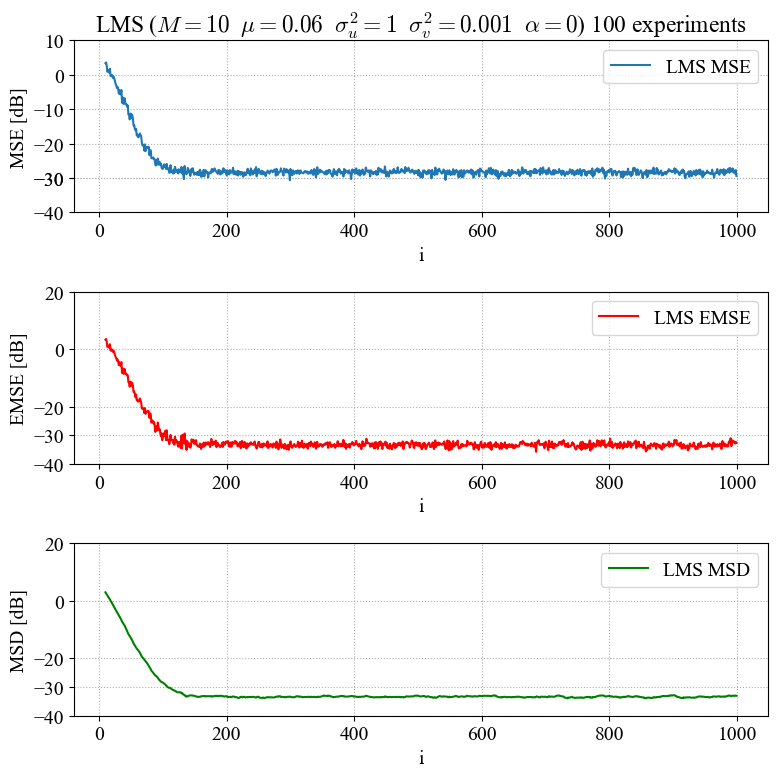

In [ ]:
#LMS implementation
mu_LMS = 0.06

se_LMS = np.zeros((runs, T)) #squared error
ese_LMS = np.zeros((runs, T)) #excess squared error
sd_LMS = np.zeros((runs, T)) #squared deviation

for k in range(runs):
    w_LMS = np.zeros((M,1))
    u = np.zeros((1,T))
    u_i = np.zeros((1,M))
    v = np.random.randn(T) * np.sqrt(s_v)
    y = np.zeros(T)
    e = np.zeros(T)
    d = np.zeros(T) 

    for i in range(1, T):
        u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.randn()
    
    for i in range(M, T):
        u_i[0, :] = u[0, i:i-M:-1]

        d[i] = (u_i@w_o + v[i]).item()
        y[i] = (u_i@w_LMS).item()
        e[i] = d[i] - y[i]

        se_LMS[k, i] = e[i]**2
        ese_LMS[k, i] = ((u_i@(w_o - w_LMS)).item())**2
        sd_LMS[k, i] = np.linalg.norm(w_o - w_LMS)**2

        w_LMS = w_LMS + mu_LMS*e[i]*u_i.T
        
    mse_LMS = np.mean(se_LMS, 0)
    emse_LMS = np.mean(ese_LMS, 0)
    msd_LMS = np.mean(sd_LMS, 0)

    mse_LMS_db = 10*np.log10(mse_LMS)
    emse_LMS_db = 10*np.log10(emse_LMS)
    msd_LMS_db = 10*np.log10(msd_LMS)


#LMS PLOTS
        
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

#LMS PLOTS
axs[0].set_title(rf'LMS ($M = {M}$  $\mu={mu_LMS}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$  $\alpha={alpha}$) {runs} experiments')
axs[0].plot(mse_LMS_db, label='LMS MSE')
axs[0].set_xlabel('i')
axs[0].set_ylabel('MSE [dB]')
axs[0].set_yticks(np.append(axs[0].get_yticks(), -30))
axs[0].grid(linestyle=':')
axs[0].legend()

#axs[1].set_title(rf'LMS EMSE (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)')
axs[1].plot(emse_LMS_db, color='r', label='LMS EMSE')
axs[1].set_xlabel('i')
axs[1].set_ylabel('EMSE [dB]')
axs[1].set_yticks(np.append(axs[1].get_yticks(), -30))
axs[1].grid(linestyle=':')
axs[1].legend()


#axs[2].set_title(rf'LMS MSD (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)')
axs[2].plot(msd_LMS_db, color='g', label='LMS MSD')
axs[2].set_xlabel('i')
axs[2].set_ylabel('MSD [dB]')
axs[2].set_yticks(np.append(axs[2].get_yticks(), -30))
axs[2].grid(linestyle=':')
axs[2].legend()

fig.tight_layout()


C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\2061125591.py:41: RuntimeWarning: divide by zero encountered in log10
  mse_NLMS_db = 10 * np.log10(mse_NLMS)
C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\2061125591.py:42: RuntimeWarning: divide by zero encountered in log10
  emse_NLMS_db = 10 * np.log10(emse_NLMS)
C:\Users\Felipe D'Ávilla\AppData\Local\Temp\ipykernel_25976\2061125591.py:43: RuntimeWarning: divide by zero encountered in log10
  msd_NLMS_db = 10 * np.log10(msd_NLMS)


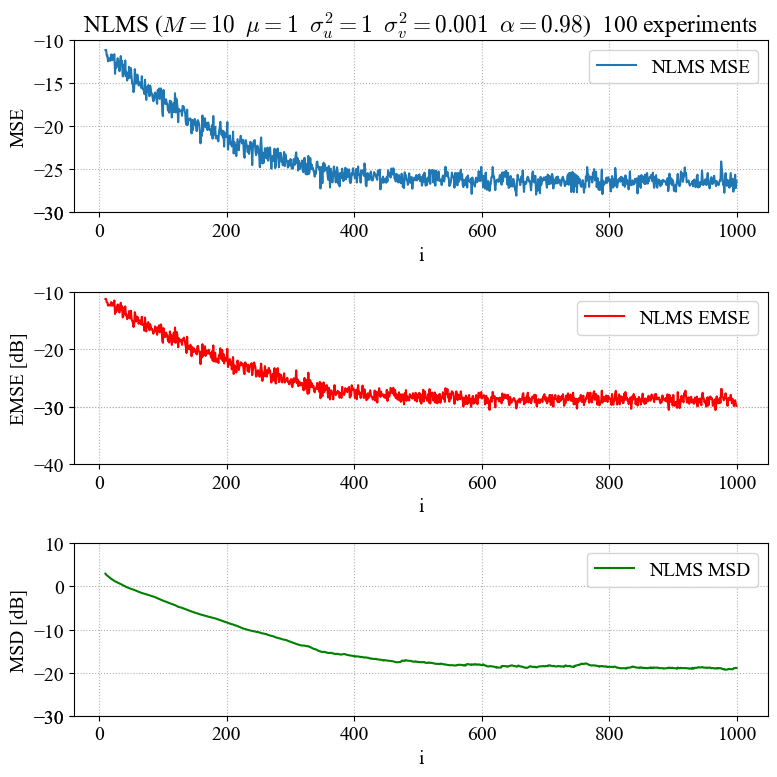

In [9]:

# NLMS implementation
mu_NLMS = 1
alpha = 0.98

se_NLMS = np.zeros((runs, T))  # squared error
ese_NLMS = np.zeros((runs, T))  # excess squared error
sd_NLMS = np.zeros((runs, T))  # squared deviation

for k in range(runs):
    w_NLMS = np.zeros((M, 1)) 
    u = np.zeros((1, T)) # input signal 
    u_i = np.zeros((1, M)) # regressor
    v = np.random.randn(T) * np.sqrt(s_v) # noise
    y = np.zeros(T) # filter output
    e = np.zeros(T) # error signal
    d = np.zeros(T) # desired signal


    for i in range(1, T):
        u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.normal(0,1)

    
    for i in range(M, T):
        u_i[0, :] = u[0, i:i-M:-1]

        d[i] = ((u_i @ w_o) + v[i]).item()
        y[i] = (u_i @ w_NLMS).item()
        e[i] = d[i] - y[i]

        se_NLMS[k, i] = e[i] ** 2
        ese_NLMS[k, i] = ((u_i @ (w_o - w_NLMS)).item()) ** 2
        sd_NLMS[k, i] = np.linalg.norm(w_o - w_NLMS) ** 2

        # Update weights with epsilon to avoid division by zero
        w_NLMS = w_NLMS + ((mu_NLMS * e[i] * u_i.T) / (np.linalg.norm(u_i) ** 2 + eps))

    mse_NLMS = np.mean(se_NLMS, 0)
    emse_NLMS = np.mean(ese_NLMS, 0)
    msd_NLMS = np.mean(sd_NLMS, 0)

    mse_NLMS_db = 10 * np.log10(mse_NLMS) 
    emse_NLMS_db = 10 * np.log10(emse_NLMS) 
    msd_NLMS_db = 10 * np.log10(msd_NLMS)


# NLMS PLOTS

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

axs[0].set_title(rf'NLMS ($M = {M}$  $\mu={mu_NLMS}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$  $\alpha={alpha}$)  {runs} experiments')
axs[0].plot(mse_NLMS_db, label='NLMS MSE')
axs[0].set_xlabel('i')
axs[0].set_ylabel('MSE')
axs[0].set_yticks(np.append(axs[0].get_yticks(), -30))
axs[0].grid(linestyle=':')
axs[0].legend()

axs[1].plot(emse_NLMS_db, color='r', label='NLMS EMSE')
axs[1].set_xlabel('i')
axs[1].set_ylabel('EMSE [dB]')
axs[1].set_yticks(np.append(axs[1].get_yticks(), -30))
axs[1].grid(linestyle=':')
axs[1].legend()

axs[2].plot(msd_NLMS_db, color='g', label='NLMS MSD')
axs[2].set_xlabel('i')
axs[2].set_ylabel('MSD [dB]')
axs[2].set_yticks(np.append(axs[2].get_yticks(), -30))
axs[2].grid(linestyle=':')
axs[2].legend()

fig.tight_layout()

C:\Users\ferna\AppData\Local\Temp\ipykernel_14788\4029348162.py:47: RuntimeWarning: divide by zero encountered in log10
  mse_APA_db = 10*np.log10(mse_APA)
C:\Users\ferna\AppData\Local\Temp\ipykernel_14788\4029348162.py:48: RuntimeWarning: divide by zero encountered in log10
  emse_APA_db = 10*np.log10(emse_APA)
C:\Users\ferna\AppData\Local\Temp\ipykernel_14788\4029348162.py:49: RuntimeWarning: divide by zero encountered in log10
  msd_APA_db = 10*np.log10(msd_APA)


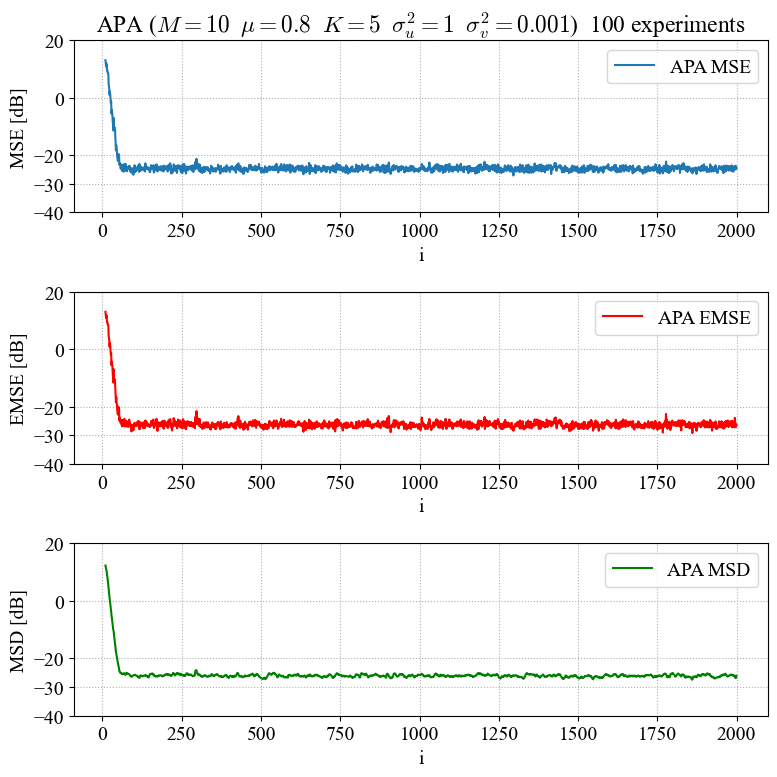

In [5]:
#APA implementation
mu_APA = 0.8
eps_APA = 1e-6
K = 5

se_APA = np.zeros((runs, T)) #squared error
ese_APA = np.zeros((runs, T)) #excess squared error
sd_APA = np.zeros((runs, T)) #squared deviation


for k in range(runs):
    w_APA = np.zeros((M,1))
    u = np.random.randn(1,T)
    u_i = np.zeros((1,M))
    v = np.random.randn(T) * np.sqrt(s_v)
    y = np.zeros(T)
    e = np.zeros(T)
    d = np.zeros(T)

    U_i = np.zeros((K, M))
    d_i = np.zeros((K, 1))
    e_i = np.zeros((K, 1))
    
    for i in range(M, T):
        u_i[0, :] = u[0, i:i-M:-1]
        U_i[1:] = U_i[:-1]
        U_i[0] = u_i

        d[i] = (u_i@w_o + v[i]).item()
        d_i[1:] = d_i[:-1]
        d_i[0] = d[i]

        y[i] = (u_i@w_APA).item()
        e[i] = d[i] - y[i]
        e_i = d_i - U_i@w_APA

        se_APA[k, i] = e[i]**2
        ese_APA[k, i] = ((u_i@(w_o - w_APA)).item())**2
        sd_APA[k, i] = np.linalg.norm(w_o - w_APA)**2

        w_APA = w_APA + mu_APA*U_i.T@np.linalg.inv(eps_APA*np.eye(K) + U_i@U_i.T)@e_i
    
    mse_APA = np.mean(se_APA, 0)
    emse_APA = np.mean(ese_APA, 0)
    msd_APA = np.mean(sd_APA, 0)

    mse_APA_db = 10*np.log10(mse_APA)
    emse_APA_db = 10*np.log10(emse_APA)
    msd_APA_db = 10*np.log10(msd_APA)


#APA PLOTS 
        
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

axs[0].set_title(rf'APA ($M = {M}$  $\mu={mu_APA}$  $K = {K}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[0].plot(mse_APA_db, label='APA MSE')
axs[0].set_xlabel('i')
axs[0].set_ylabel('MSE [dB]')
#axs[0].set_ylim(-37, np.max(mse_APA_db))
axs[0].set_yticks(np.append(axs[0].get_yticks(), -30))
axs[0].grid(linestyle=':')
axs[0].legend()

#axs[1].set_title(rf'APA EMSE (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[1].plot(emse_APA_db, color='r', label='APA EMSE')
axs[1].set_xlabel('i')
axs[1].set_ylabel('EMSE [dB]')
#axs[1].set_ylim(-37, np.max(emse_APA_db))
axs[1].set_yticks(np.append(axs[1].get_yticks(), -30))
axs[1].grid(linestyle=':')
axs[1].legend()


#axs[2].set_title(rf'APA MSD (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[2].plot(msd_APA_db, color='g', label='APA MSD')
axs[2].set_xlabel('i')
axs[2].set_ylabel('MSD [dB]')
#axs[2].set_ylim(-37, np.max(msd_APA_db))
axs[2].set_yticks(np.append(axs[2].get_yticks(), -30))
axs[2].grid(linestyle=':')
axs[2].legend()

fig.tight_layout()


C:\Users\ferna\AppData\Local\Temp\ipykernel_2000\806449489.py:46: RuntimeWarning: divide by zero encountered in log10
  mse_RLS_db = 10*np.log10(mse_RLS)
C:\Users\ferna\AppData\Local\Temp\ipykernel_2000\806449489.py:47: RuntimeWarning: divide by zero encountered in log10
  emse_RLS_db = 10*np.log10(emse_RLS)
C:\Users\ferna\AppData\Local\Temp\ipykernel_2000\806449489.py:48: RuntimeWarning: divide by zero encountered in log10
  msd_RLS_db = 10*np.log10(msd_RLS)


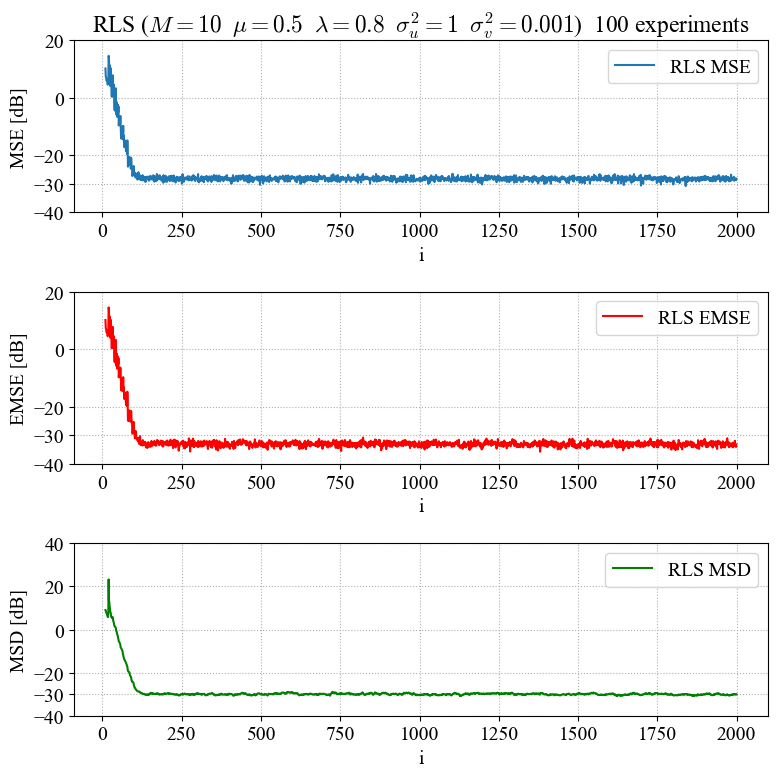

In [54]:
#RLS implementation
mu_RLS = 0.5
eps_RLS = 1e-6
lambda_RLS = 0.8

alpha = 0.6

se_RLS = np.zeros((runs, T)) #squared error
ese_RLS = np.zeros((runs, T)) #excess squared error
sd_RLS = np.zeros((runs, T)) #squared deviation


for k in range(runs):
    w_RLS = np.zeros((M,1))
    u = np.zeros((1,T))
    u_i = np.zeros((1,M))
    v = np.random.randn(T) * np.sqrt(s_v)
    y = np.zeros(T)
    e = np.zeros(T)
    d = np.zeros(T)

    P_i = np.eye(M)/eps_RLS

   
    for i in range(1, T):
        u[0, i] = alpha * u[0, i-1] + np.sqrt(1 - alpha**2) * np.random.randn()

        if i >= M:
            u_i[0, :] = u[0, i:i-M:-1]
            d[i] = (u_i@w_o + v[i]).item()
            y[i] = (u_i@w_RLS).item()
            e[i] = d[i] - y[i]

            P_i = (1/lambda_RLS) * (P_i - (P_i@u_i.T@u_i@P_i)/(lambda_RLS + u_i@P_i@u_i.T))

            se_RLS[k, i] = e[i]**2
            ese_RLS[k, i] = ((u_i@(w_o - w_RLS)).item())**2
            sd_RLS[k, i] = np.linalg.norm(w_o - w_RLS)**2

            w_RLS = w_RLS + mu_RLS * P_i @ u_i.T * e[i]

        mse_RLS = np.mean(se_RLS, 0)
        emse_RLS = np.mean(ese_RLS, 0)
        msd_RLS = np.mean(sd_RLS, 0)

        mse_RLS_db = 10*np.log10(mse_RLS)
        emse_RLS_db = 10*np.log10(emse_RLS)
        msd_RLS_db = 10*np.log10(msd_RLS)


#RLS PLOTS 
        
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

axs[0].set_title(rf'RLS ($M = {M}$  $\mu={mu_RLS}$  $\lambda = {lambda_RLS}$  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[0].plot(mse_RLS_db, label='RLS MSE')
axs[0].set_xlabel('i')
axs[0].set_ylabel('MSE [dB]')
#axs[0].set_ylim(-37, np.max(mse_RLS_db))
axs[0].set_yticks(np.append(axs[0].get_yticks(), -30))
axs[0].grid(linestyle=':')
axs[0].legend()

#axs[1].set_title(rf'RLS EMSE (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[1].plot(emse_RLS_db, color='r', label='RLS EMSE')
axs[1].set_xlabel('i')
axs[1].set_ylabel('EMSE [dB]')
#axs[1].set_ylim(-37, np.max(emse_RLS_db))
axs[1].set_yticks(np.append(axs[1].get_yticks(), -30))
axs[1].grid(linestyle=':')
axs[1].legend()


#axs[2].set_title(rf'RLS MSD (M = {M}  $\sigma_u^2=1$  $\sigma_v^2={s_v}$)  {runs} experiments')
axs[2].plot(msd_RLS_db, color='g', label='RLS MSD')
axs[2].set_xlabel('i')
axs[2].set_ylabel('MSD [dB]')
#axs[2].set_ylim(-37, np.max(msd_RLS_db))
axs[2].set_yticks(np.append(axs[2].get_yticks(), -30))
axs[2].grid(linestyle=':')
axs[2].legend()

fig.tight_layout()
